In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import json
from math import sqrt
%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./timeSqExp/testNaive/"

df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

print(df)

    x  y  z     x_std     y_std     z_std   time        x+        y+  \
0   0  0  0  0.099504  0.099504  0.099504  16089  0.099504  0.099504   
1   0  0  0  0.337670  0.337668  0.337670   3277  0.337670  0.337668   
2   0  0  0  0.604295  0.604289  0.604292   4555  0.604295  0.604289   
3   0  0  0  0.797352  0.797344  0.797348   5026  0.797352  0.797344   
4   0  0  0  0.912505  0.912495  0.912501   4179  0.912505  0.912495   
.. .. .. ..       ...       ...       ...    ...       ...       ...   
95  0  0  0  0.985629  0.985670  0.985613  10007  0.985629  0.985670   
96  0  0  0  0.985632  0.985646  0.985626  10044  0.985632  0.985646   
97  0  0  0  0.985633  0.985637  0.985630   9394  0.985633  0.985637   
98  0  0  0  0.985634  0.985635  0.985633   9372  0.985634  0.985635   
99  0  0  0  0.985636  0.985636  0.985635   9836  0.985636  0.985636   

          z+        x-        y-        z-  
0   0.099504 -0.099504 -0.099504 -0.099504  
1   0.337670 -0.337670 -0.337668 -0.337670  


In [3]:
path = pd.read_csv("path.csv")

print(path.tail())

df['gnd_x'] = path["x"] 
df['gnd_y'] = path["y"]
df['gnd_z'] = path["z"]

df.iloc[10]

      index         x         y         z
996     996 -0.263446 -0.067733  2.088647
997     997 -0.364201 -0.028504  2.140708
998     998 -0.454753  0.004004  2.182574
999     999 -0.537369  0.025985  2.214841
1000   1000 -0.615967  0.034738  2.237601


x           0.000000
y           0.000000
z           0.000000
x_std       0.999947
y_std       0.999945
z_std       0.999944
time     6933.000000
x+          0.999947
y+          0.999945
z+          0.999944
x-         -0.999947
y-         -0.999945
z-         -0.999944
gnd_x       0.076027
gnd_y      -0.658572
gnd_z      -1.079498
Name: 10, dtype: float64

<IPython.core.display.Javascript object>


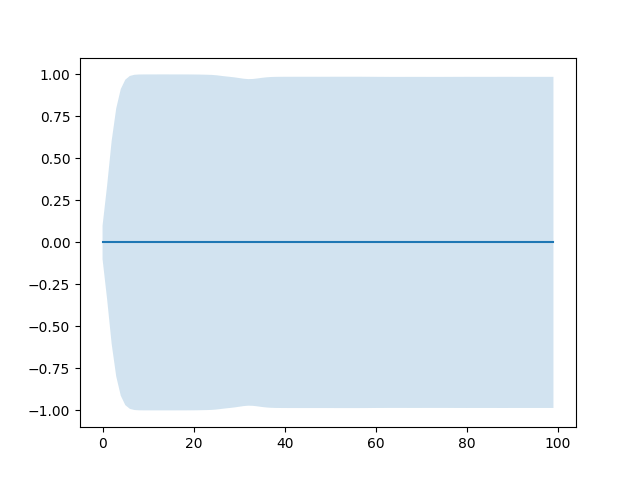

<IPython.core.display.Javascript object>


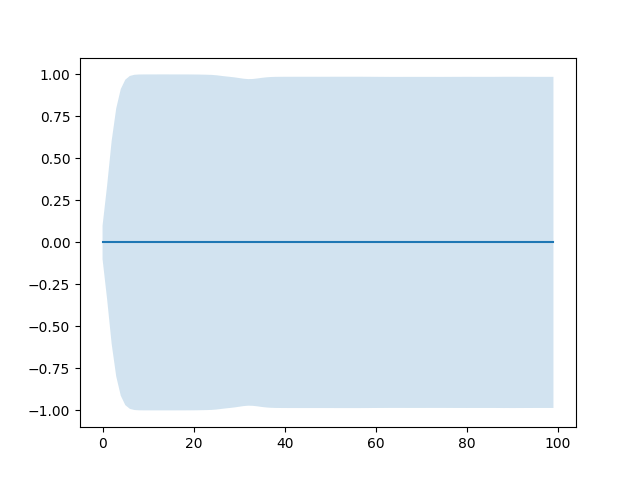

<IPython.core.display.Javascript object>


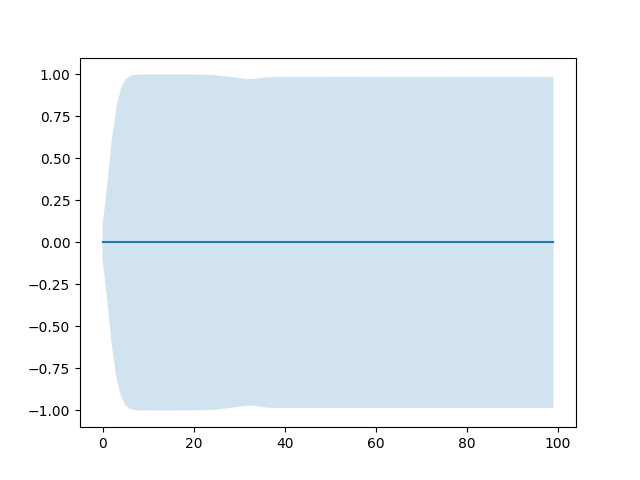

In [4]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
# plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
# plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
# plt.plot(df.index, df['gnd_z'])

plt.show()


3.5273285075627827


<IPython.core.display.Javascript object>


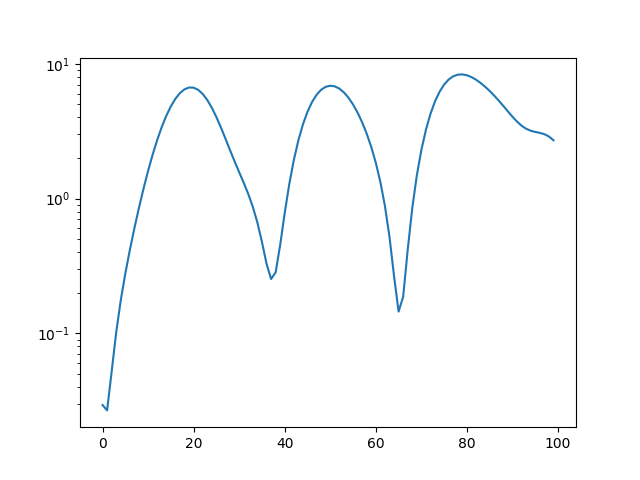

In [5]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


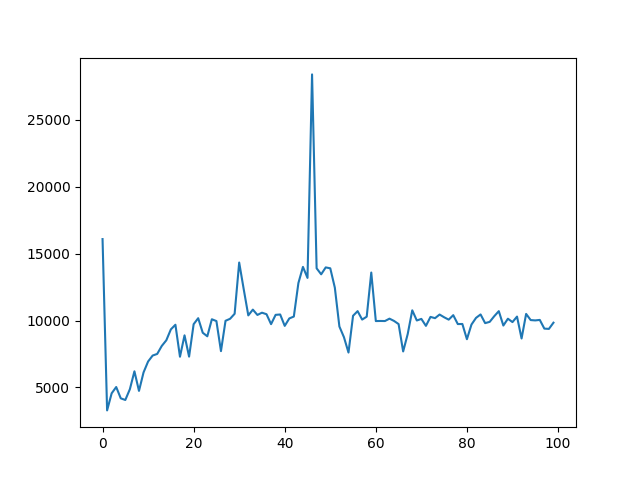

0.98854 s


In [6]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time'])/10**6, "s")
plt.show()

In [27]:
# anchors = pd.read_csv(prefix+"anchors.csv")

with open("../anchors.json") as f:
    anchors = json.load(f)
    
x = [anchor["x"] for anchor in anchors]
y = [anchor["y"] for anchor in anchors]
z = [anchor["z"] for anchor in anchors]

anchors = list(zip(x,y,z))

a=11
path__ = (df["gnd_x"][a],df["gnd_y"][a],df["gnd_z"][a])
print(np.linalg.norm(np.array(anchors[3])-np.array(path__)))


1.7210722180742541


<IPython.core.display.Javascript object>


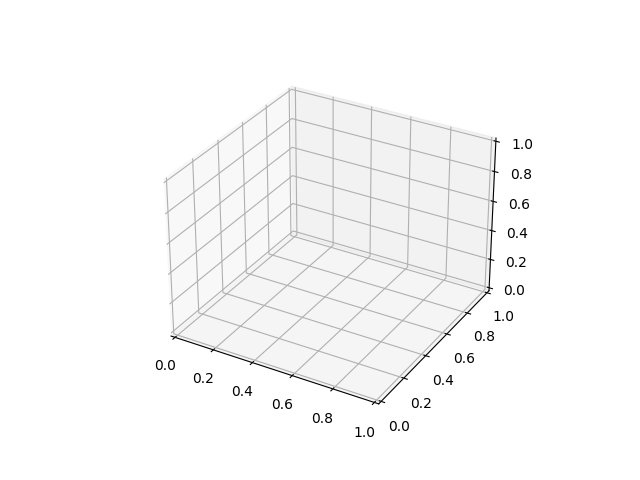

NameError: name 'df_50' is not defined

In [8]:
# df_50 = df[:50]

ax = plt.figure().add_subplot(projection='3d')
# ax.scatter(x,y,z)
ax.plot(df_50['x'],df_50['y'],df_50['z'], c="orange")
# ax.plot(df_50['gnd_x'],df_50['gnd_y'],df_50['gnd_z'], c="green")



In [ ]:
print(sum(df['time'])/10**6, "s")
print(se[len(se)-1])

In [ ]:


dx = [sqrt((anchors[0][0] - df["gnd_x"][i])**2+(anchors[0][1] - df["gnd_y"][i])**2+(anchors[0][2] - df["gnd_z"][i])**2) for i in range (30)]
print(dx)


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
